In [249]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Моделирование отсчётов случайного процесса.**

Объявление параметров модели.

In [250]:
T = 20
D = 5
alpha = 0.1
n = 150

Заданная ковариационная функция R(t).

In [251]:
def R(t):
    return D * math.exp(- alpha * abs(t))

Моделирование отсчётов случайного процесса по готовой формуле, полученной с помощью метода авторегрессии - скользящего среднего (ARMA).

In [252]:
def gen_ksi():
    np.random.seed(2023)
    
    x = [[0] * (T + 1)] * n
    for j in range(n):
        x[j] = np.random.normal(0, 1, T + 1)
    a0 = math.sqrt(D * (1 - math.exp(- 2 * alpha)))
    b1 = math.exp(- alpha)

    res = [[0.] * (T + 1)] * n
    for j in range(n):
        res[j] = [0.] * (T + 1)

    for t in range(T + 1):
        res[0][t] = a0 * x[0][t]
        for j in range(1, n):
            res[j][t] = a0 * x[j][t] + b1 * res[j - 1][t]

    return res

In [253]:
ksi = gen_ksi()

In [254]:
def X(i):
    return ksi[i]

Графическое представление отсчётов.

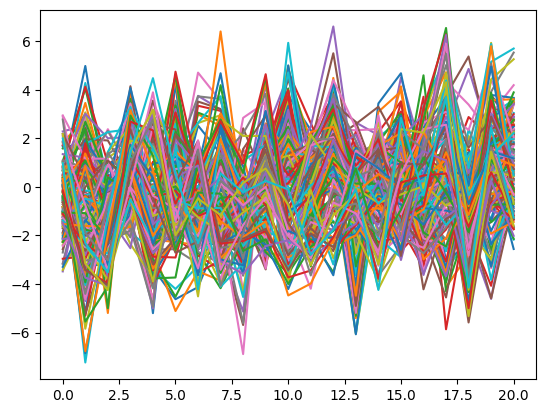

In [255]:
for i in range(n):
    plt.plot(X(i))

plt.show()